In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import interpolate

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,32600.0,52200.0,0.04,0.006,0.31,1.224949e+07,0.141918,0.858082,1.059118e+06,220.584462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32703.0,52200.0,0.02,0.001,0.31,1.224911e+07,0.141804,0.858196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32807.0,52200.0,0.03,0.002,0.31,1.224864e+07,0.141688,0.858312,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32910.0,52200.0,0.04,0.008,0.31,1.224807e+07,0.141571,0.858429,5.634563e+05,286.379301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33014.0,52200.0,0.03,0.004,0.31,1.224740e+07,0.141452,0.858548,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
features = data[['easting', 'northing', 'porosity']].dropna()
train_x, test_x, train_y, test_y = train_test_split(features[['easting', 'northing']], features['porosity'], test_size=0.8, random_state=0)

In [142]:
interpolated_function = interpolate.interp2d(features['easting'].values, features['northing'].values, features['porosity'].values, kind='quintic')

In [143]:
def plot_feature(function, feature, precision=100):
    easting = data['easting']
    northing = data['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    predictions = function(x, y).reshape(precision, precision)
        
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.imshow(predictions, vmin=features[feature].min(), vmax=features[feature].max())
    plt.colorbar()

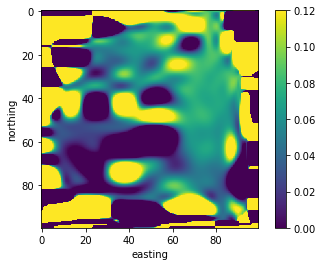

In [144]:
plot_feature(interpolated_function, 'porosity')

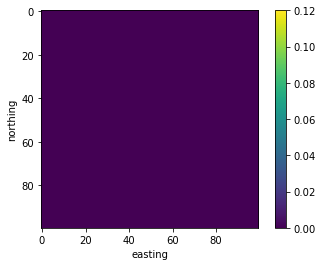

In [141]:
feature='porosity'
degree = 3
precision = 100
easting = data['easting']
northing = data['northing']
x = np.linspace(easting.min(), easting.max(), precision)
y = np.linspace(northing.min(), northing.max(), precision)
coefficients = np.polyfit(x, y, degree)

# predictions = np.polynomial.polynomial.polyval2d(x, y, coefficients).reshape(1, 1)
predictions = []

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        predictions.append(np.polynomial.polynomial.polyval2d(x[i], y[j], coefficients))

predictions = np.array(predictions).reshape(precision, precision)
        
plt.xlabel('easting')
plt.ylabel('northing')    
plt.imshow(predictions, vmin=features[feature].min(), vmax=features[feature].max())
plt.colorbar()